## **Needed Libraries**

In [152]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## **Training CSV's**

In [153]:
df_training = pd.read_csv('treinar.csv')
df_training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Testing CSV's**

In [154]:
df_test = pd.read_csv('testar.csv')
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## **Raw Information**

#### 1. General Overview 

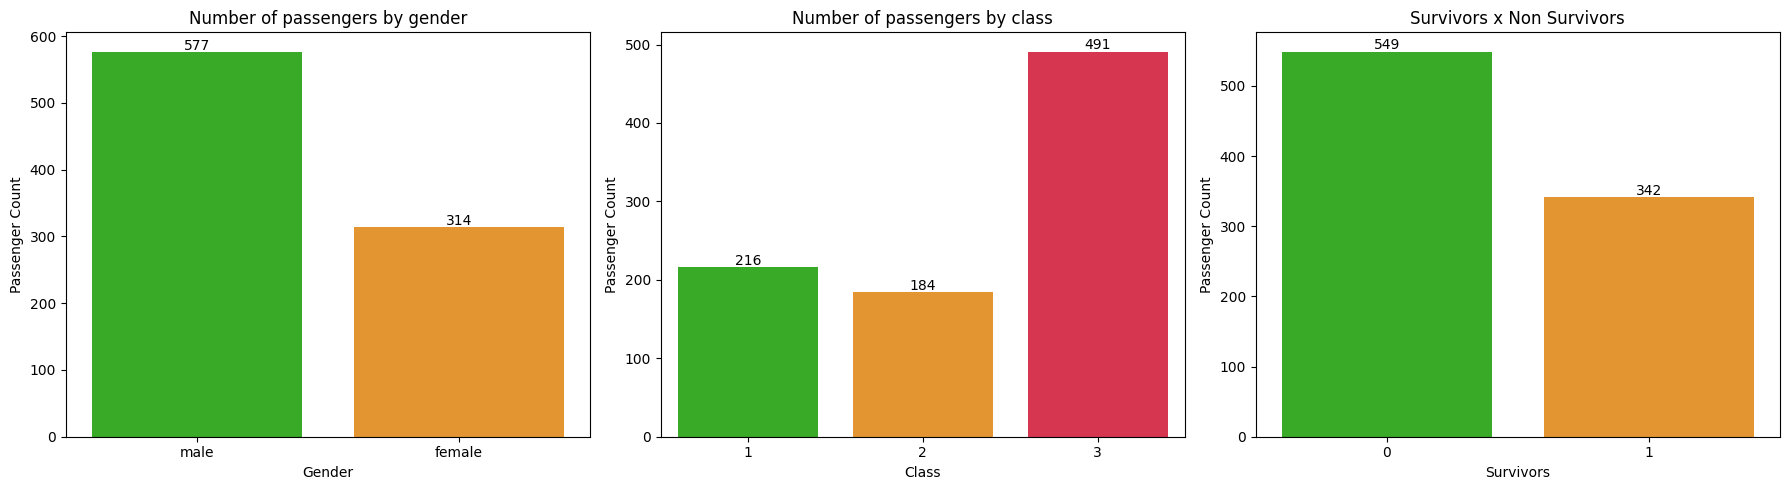

In [155]:
fig, axis = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(x='Sex', data=df_training, ax=axis[0], palette=['#29bf12', '#ff9914'])
axis[0].set_title('Number of passengers by gender')
axis[0].set_xlabel('Gender')
axis[0].set_ylabel('Passenger Count')

for p in axis[0].patches:
    height = p.get_height()
    axis[0].text(p.get_x() + p.get_width() / 2, height + 3, f'{height:.0f}', ha='center')


sns.countplot(x='Pclass', data=df_training, ax=axis[1], palette=['#29bf12', '#ff9914', '#f21b3f'])
axis[1].set_title('Number of passengers by class')
axis[1].set_xlabel('Class')
axis[1].set_ylabel('Passenger Count')

for p in axis[1].patches:
    height = p.get_height()
    axis[1].text(p.get_x() + p.get_width() / 2, height + 3, f'{height:.0f}', ha='center')

sns.countplot(x='Survived',data=df_training, ax=axis[2], palette=['#29bf12', '#ff9914'])
axis[2].set_title('Survivors x Non Survivors')
axis[2].set_xlabel('Survivors')
axis[2].set_ylabel('Passenger Count')

for p in axis[2].patches:
    height = p.get_height()
    axis[2].text(p.get_x() + p.get_width() / 2, height + 3, f'{height:.0f}', ha='center')

plt.tight_layout()
plt.show()

#### 2. Survival by Individual Variables

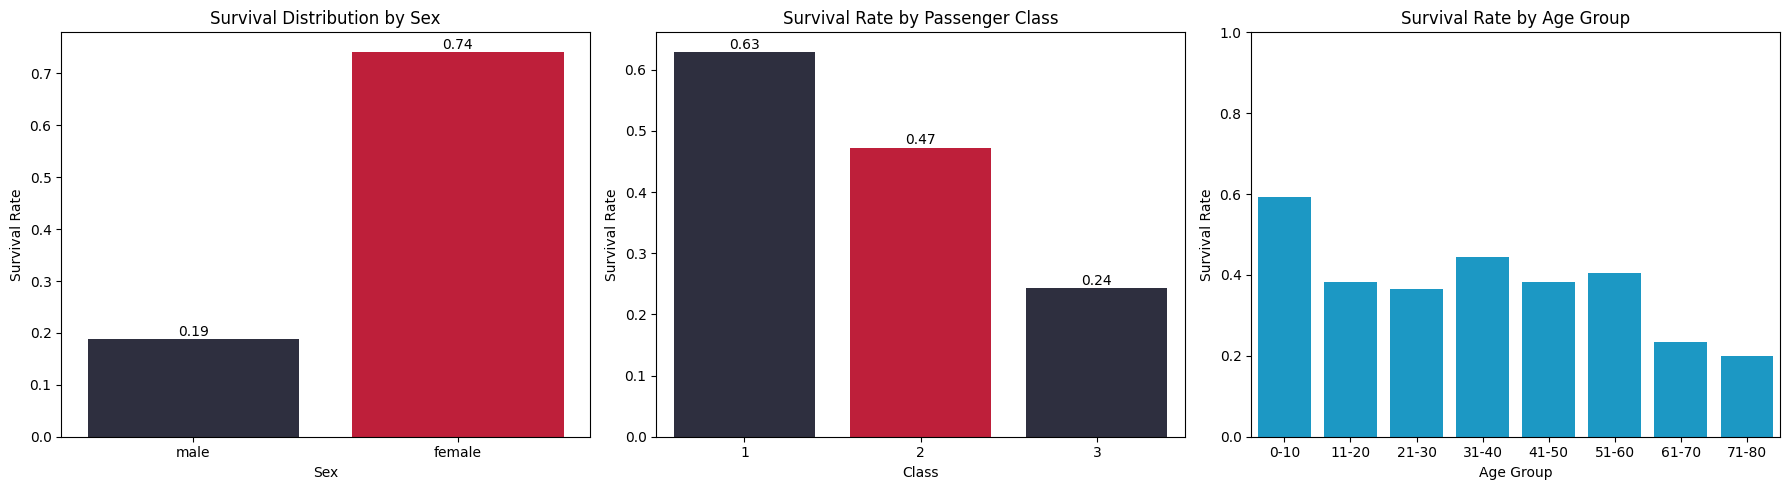

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Sex', y='Survived', data=df_training, ax=axis[0], palette=['#2B2D42', '#D90429'], ci=None)
axis[0].set_title('Survival Distribution by Sex')
axis[0].set_xlabel('Sex')
axis[0].set_ylabel('Survival Rate')

for p in axis[0].patches:
    height = p.get_height()
    axis[0].text(p.get_x() + p.get_width() / 2, height + 0.005, f'{height:.2f}', ha='center')

sns.barplot(x='Pclass', y='Survived', data=df_training, ax=axis[1], order=[1,2,3], palette=['#2B2D42', '#D90429'], ci=None)
axis[1].set_title('Survival Rate by Passenger Class')
axis[1].set_xlabel('Class')
axis[1].set_ylabel('Survival Rate')

for p in axis[1].patches:
    height = p.get_height()
    axis[1].text(p.get_x() + p.get_width() / 2, height + 0.005, f'{height:.2f}', ha='center')

# create age intervals
df_training['AgeGroup'] = pd.cut(df_training['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[
    '0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'
])

# Calculate the survival rate of each interval
age_survival = df_training.groupby('AgeGroup')['Survived'].mean().reset_index()

sns.barplot(x='AgeGroup', y='Survived', data=age_survival, palette=['#00A5E0'] * len(age_survival))
axis[2].set_title('Survival Rate by Age Group')
axis[2].set_xlabel('Age Group')
axis[2].set_ylabel('Survival Rate')
axis[2].set_ylim(0, 1)  # rate (0 a 100%)

plt.tight_layout()
plt.show()


#### 3. Interactions Between Variables

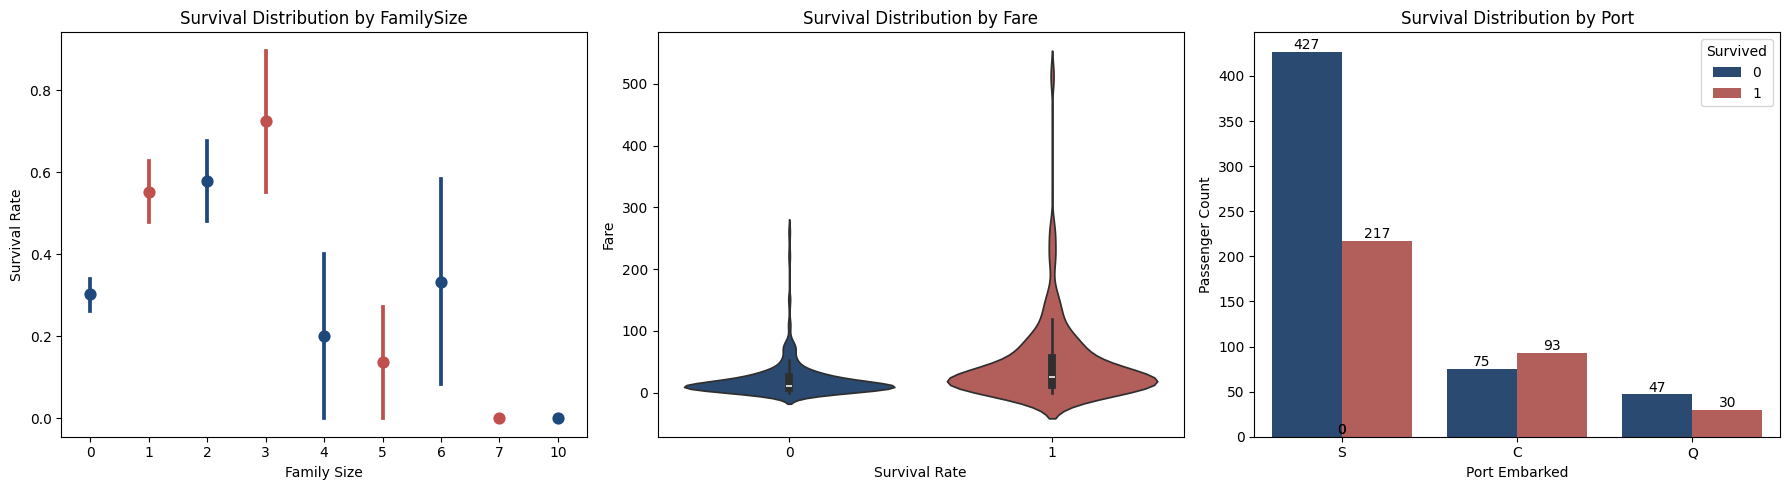

In [157]:
fig, axis = plt.subplots(1, 3, figsize=(18,5))

df_training['Family Size'] = df_training['SibSp'] + df_training['Parch']
sns.pointplot(x='Family Size', y='Survived', data=df_training, ax=axis[0], palette=['#1f497d', '#c0504d'])
axis[0].set_title('Survival Distribution by FamilySize')
axis[0].set_xlabel('Family Size')
axis[0].set_ylabel('Survival Rate')

sns.violinplot(x='Survived', y='Fare', data=df_training, ax=axis[1], palette=['#1f497d', '#c0504d'])
axis[1].set_title('Survival Distribution by Fare')
axis[1].set_xlabel('Survival Rate')
axis[1].set_ylabel('Fare')

sns.countplot(x='Embarked', hue='Survived', data=df_training, fill=True, ax=axis[2], palette=['#1f497d', '#c0504d'])
axis[2].set_title('Survival Distribution by Port')
axis[2].set_xlabel('Port Embarked')
axis[2].set_ylabel('Passenger Count')

for p in axis[2].patches:
    height = p.get_height()
    axis[2].text(p.get_x() + p.get_width() / 2, height + 3, f'{height:.0f}', ha='center')

plt.tight_layout()
plt.show()

#### 4. Correlations and Numerical Overview

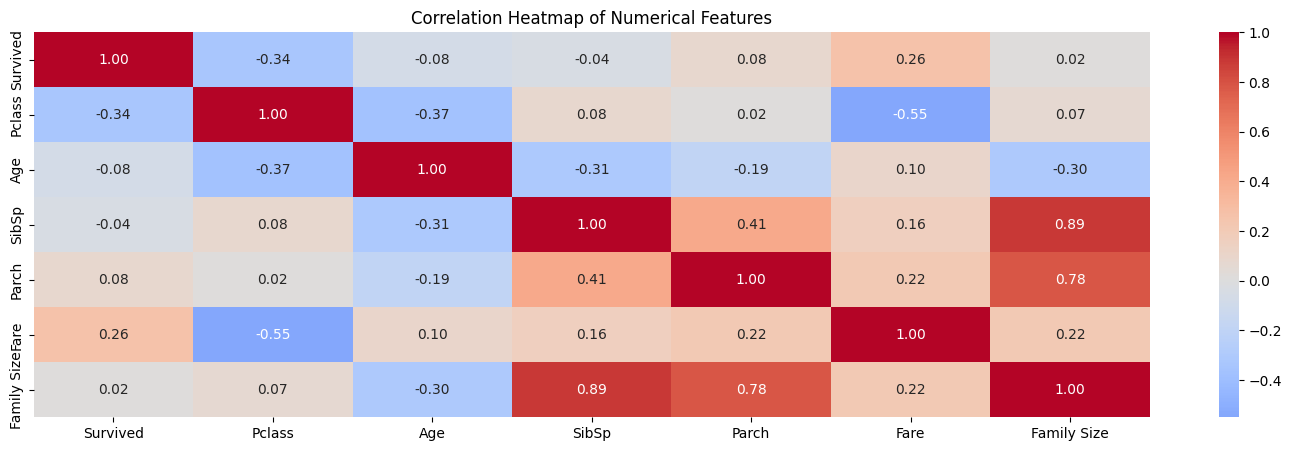

In [158]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family Size'] # crucial cols for correlation
corr = df_training[cols].corr()

plt.figure(figsize=(18,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## **Clean and Process Data**

In [159]:
def processar_csv(df):
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Cabin'].fillna('Unknown', inplace=True)
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
    return df


train_df = processar_csv(pd.read_csv('treinar.csv'))
test_df = processar_csv(pd.read_csv('testar.csv'))
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,0,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,Unknown,3,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,True,False,False


## **Model**

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_C']

X = train_df[features]
y = train_df['Survived']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.20, random_state=1)

model = DecisionTreeClassifier(random_state=1)
model.fit(train_X, train_y)

val_preds = model.predict(val_X)

accuracy = accuracy_score(val_y, val_preds)
print(f"Accuracy = {accuracy:.2%}")

mae = mean_absolute_error(val_y, val_preds)
print(f"Mean Absolute Error: {mae:.4f}")

model.fit(X, y)

test_X = test_df[features]
test_preds = model.predict(test_X)

print(f"Test Predictions: {test_preds}")

print(classification_report(val_y, val_preds, target_names=["Survived", "Not Survived"]))

Accuracy = 75.42%
Mean Absolute Error: 0.2458
Test Predictions: [0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]
              precision    recall  f1-score   support

    Survived       0.76      0.8

## 📈 **Model Evaluation – Decision Tree**

After training the model using the `DecisionTreeClassifier` algorithm, predictions were generated based on the validation dataset and evaluated using standard classification metrics.

### 🔍 **Classification Report**

| **Class**             | **Precision** | **Recall** | **F1-score** | **Support** |
|----------------------|---------------|------------|--------------|-------------|
| *Survived*           | 0.76          | 0.86       | 0.81         | 106         |
| *Didn't Survive*     | 0.75          | 0.60       | 0.67         | 73          |
| **Overall Accuracy** |               |            | **0.75**     | 179         |

- **Precision**: Among the passengers predicted as *"Survived"*, **76% actually survived**.
- **Recall (Sensitivity)**: Out of all passengers who truly survived, the model correctly identified **86%**.
- **F1-score**: The harmonic mean of precision and recall, representing the balance between them.
- **Accuracy**: The model achieved an overall prediction accuracy of **75%** on the validation set.

### 📌 **Conclusion**

The model showed strong performance in identifying passengers who **survived**, with a high recall of **86%**. However, it had more difficulty correctly predicting those who **did not survive** (recall = **60%**), indicating a tendency toward predicting positive cases (i.e., survivors).

To improve the balance between classes, consider:
- Adjusting the parameter `class_weight='balanced'` in the model
- Trying more robust algorithms such as **Random Forest** or **XGBoost**
- Applying data balancing techniques like **oversampling** or **undersampling**


### 🧮 **MAE – Mean Absolute Error**

The obtained Mean Absolute Error (MAE) was **0.2458**. This means that, on average, the model was wrong in **24.58%** of its predictions compared to the actual values (0 = *did not survive*, 1 = *survived*).

Although MAE is more commonly used in regression tasks, it can be applied here as a way to **measure the average classification error**. In this context, the MAE aligns with the **accuracy of 75%**, indicating that the model makes an incorrect prediction in approximately **1 out of every 4 cases**.

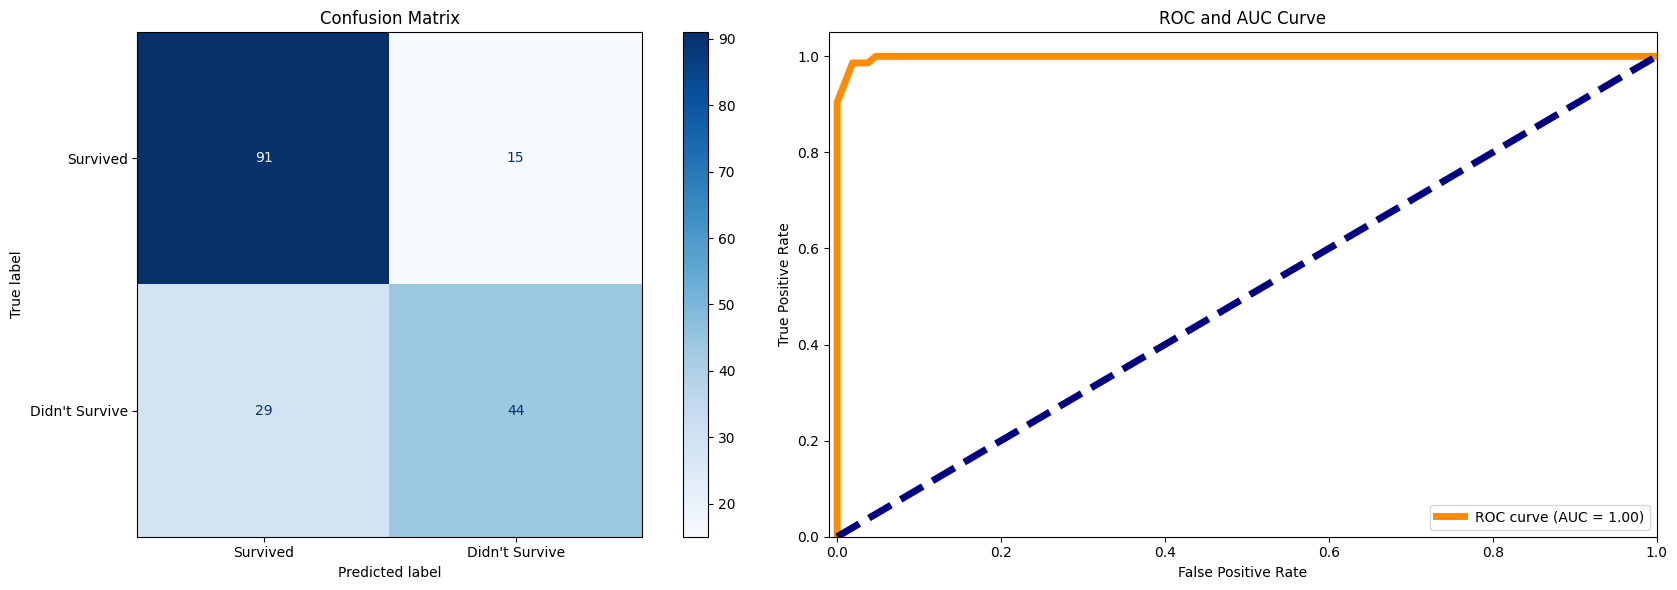

In [161]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))

cm = confusion_matrix(val_y, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Didn't Survive"])
disp.plot(cmap='Blues', ax=axis[0])
axis[0].set_title("Confusion Matrix")


y_val_prob = model.predict_proba(val_X)[:,1] # only for class survived
fpr, tpr, _ = roc_curve(val_y, y_val_prob)
roc_auc = auc(fpr, tpr)
axis[1].plot(fpr, tpr, color='darkorange', lw=5, label=f"ROC curve (AUC = {roc_auc:.2f})")
axis[1].plot([0,1], [0,1], color='navy', lw=5, linestyle="--")
axis[1].set_xlim([-0.01, 1.0])
axis[1].set_ylim([0.0, 1.05]) # value over 1.0 to create a gap above the curve and the top of the graph
axis[1].set_xlabel("False Positive Rate")
axis[1].set_ylabel("True Positive Rate")
axis[1].set_title("ROC and AUC Curve")
axis[1].legend(loc="lower right")


plt.tight_layout()
plt.show()

<div style="display: flex; justify-content: space-between;">

<div style="width: 49.5%; padding-right: 40px; font-size: 20px; line-height: 1.4;">

### 📊 Confusion Matrix - Error Analysis

- Of the **120 predicted as "survived"**:
  - **91 actually survived** (True Positives)  
  - **29 did not survive** (False Positives)  
  - → Error: $\frac{29}{120} \approx 0.2416$

- Of the **59 predicted as "did not survive"**:
  - **15 actually survived** (False Negatives)  
  - **44 did not survive** (True Negatives)  
  - → Error: $\frac{15}{59} \approx 0.2542$

**Note:** The accuracy for those predicted as "did not survive" is  $\frac{44}{59} \approx 0.74576$

</div>

<div style="width: 49.5%; padding-left: 50px; font-size: 20px; line-height: 1.4;">

### 📈 ROC Curve Analysis

- The **ROC curve** (Receiver Operating Characteristic) plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.
- AUC (Area Under the Curve) = **1.00**, which means:
  - The classifier perfectly distinguishes between the two classes.
  - There are no false positives or false negatives for any threshold.
- The orange curve is the model performance, and the dashed navy line represents **random guessing** (AUC = 0.5).
- Since the orange curve hugs the top-left corner and achieves AUC = 1.00, the classifier has **perfect discrimination ability**.

</div>

</div>
